# Heart Disease Prediction using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach:---------
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Step 1: Problem Defination

>Given clinical parameters about a patient, can we predict wheather or not they have heart disease ???

> It's a classification problem then

## Step 2: Data


This database contains 76 attributes, but 14 of them is used in all published experiments. It is part of Cleveland database that has been used by ML researchers to this date and orginated from UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

The CSV version of this data is available on Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [4]:
# Import the data
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Step 3: Evaluation

> If we can reach **95% accuracy** at predicting whether or not a patient has heart attack disease during the proof of concept, we'll pursue the project.

## Step 4: Features 

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising

14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here

### Preparing the tools

In [3]:
# Exploratory Data Analysis (EDA) imports
import pandas as pd
import numpy as np

# We want our plots to appear inside the (old version) notebook 
%matplotlib inline  

# Data Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models import (consult Sklearn Model Map to choose)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation import (for Classification Problem)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load data

In [5]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
print(f" (rows, cols) = {heart_disease.shape}")

 (rows, cols) = (303, 14)


### Data Exploration (EDA or exploratory data analysis) 

The goal is to find out more about the data and become subject matter expart on the dataset you are working with ?
1. What questions are you trying to  solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and  how to deal with it ?
4. Where are the outliners and why should you care about them ?
5. How can you add, change or remove features to get more out of the data ?

In [4]:
# Lets find out how many of class therein 'target' col
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

**Balance Classification Problem:** relatively similar amounts of instances in each class (ideal scenario)

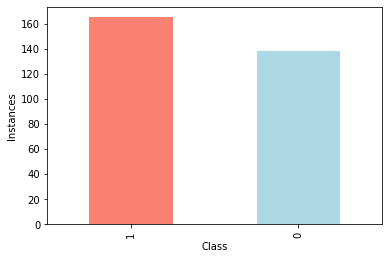

In [5]:
heart_disease["target"].value_counts().plot(kind="bar",
                                            color=["salmon", "lightblue"],
                                            xlabel="Class",
                                            ylabel="Instances");

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values are there

In [8]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart DIsease Frquency according to Sex

In [9]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

More males than female

In [10]:
#Compare target col with sex col
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


**Inference**: Females have more chance of heart diseasethan males

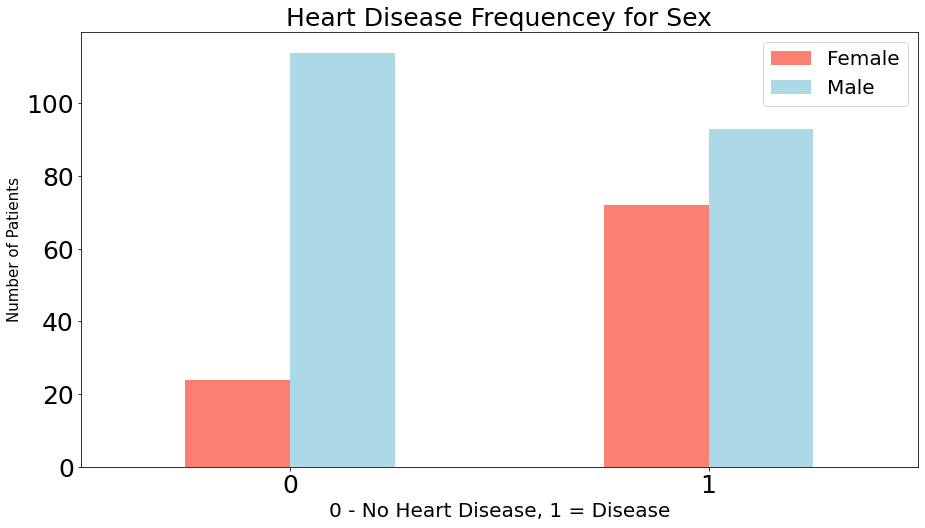

In [40]:
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar",
                                                          figsize = (15, 8),
                                                          color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequencey for Sex",fontsize=25)
plt.xlabel("0 - No Heart Disease, 1 = Disease", fontsize=20)
plt.ylabel("Number of Patients", fontsize=15)
plt.legend(["Female","Male"], fontsize=20)
plt.xticks(fontsize=25, rotation=0);
plt.yticks(fontsize=25, rotation=0);

In [41]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
heart_disease["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

#### Age vs. Max Heart Rate (thalach) 

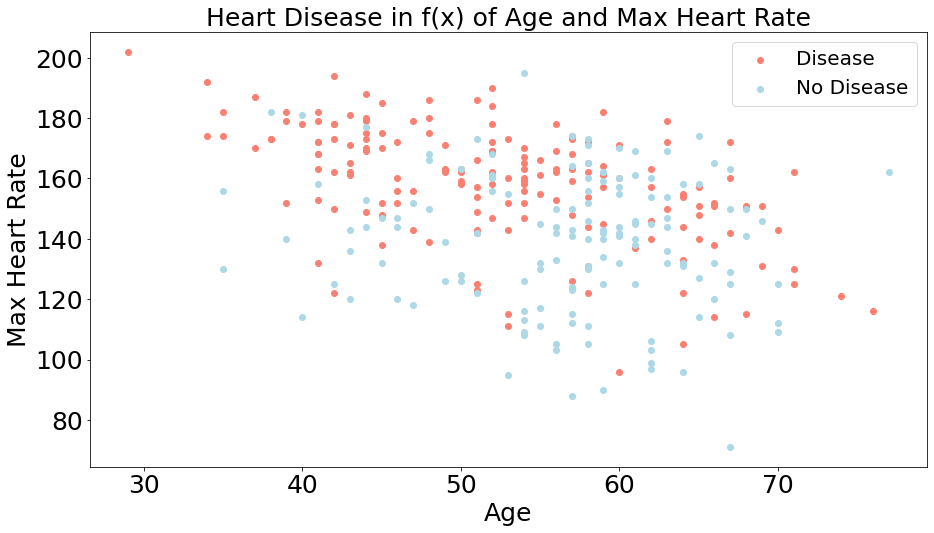

In [61]:
plt.figure(figsize=(15, 8))
    
# Scatter with positive instances
plt.scatter(heart_disease.age[heart_disease.target ==1],
            heart_disease.thalach[heart_disease.target==1],
            color="salmon")

# Scatter with negative instances
plt.scatter(heart_disease.age[heart_disease.target ==0],
            heart_disease.thalach[heart_disease.target==0],
            color="lightblue")

# Add some useful info
plt.title("Heart Disease in f(x) of Age and Max Heart Rate",fontsize=25)
plt.xlabel("Age", fontsize=25)
plt.ylabel("Max Heart Rate", fontsize=25)
plt.legend(["Disease","No Disease"],loc=0, fontsize=20)
plt.xticks(fontsize=25, rotation=0);
plt.yticks(fontsize=25, rotation=0);

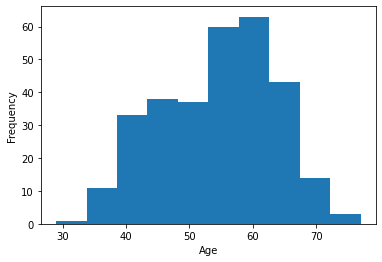

In [63]:
# Check the ditribution of the column with a histogram
heart_disease.age.plot.hist(); 
plt.xlabel("Age", fontsize=10);

looks like a Normal Distribution (balanced distrbution), Most of the data lies in the range of 50 & 60

#### Heart Disease Frequency per Chest Pain (cp) Type
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [64]:
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


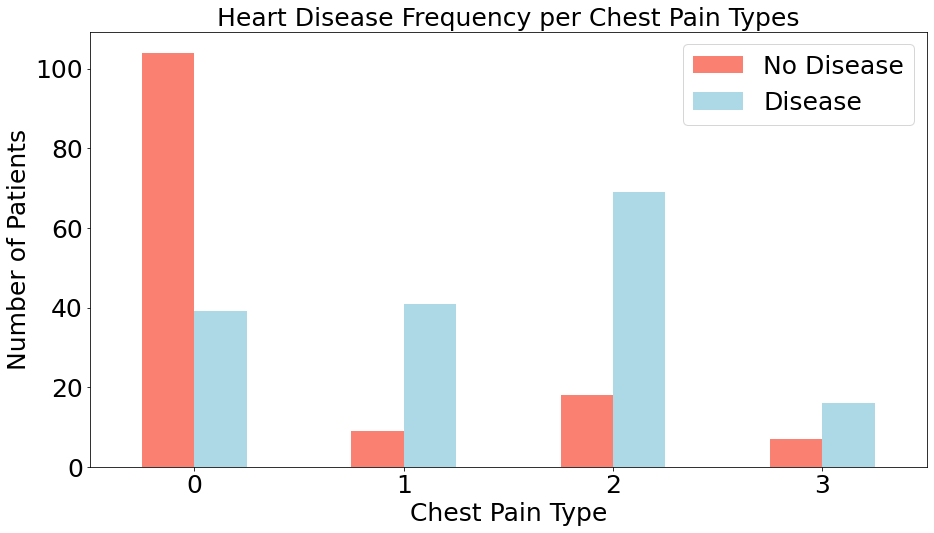

In [3]:
# Make cross tab more visual
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind="bar",
                                                         figsize = (15, 8),
                                                         color=["salmon", "lightblue"])
# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Types",fontsize=25)
plt.xlabel("Chest Pain Type", fontsize=25)
plt.ylabel("Number of Patients", fontsize=25)
plt.legend(["No Disease","Disease"], fontsize=25)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0);

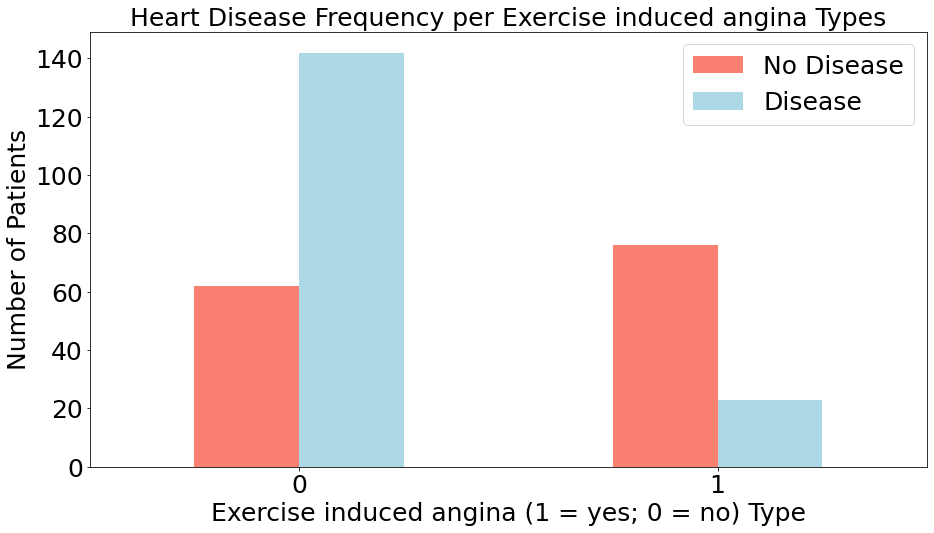

In [9]:
# Make cross tab more visual
pd.crosstab(heart_disease.exang, heart_disease.target).plot(kind="bar",
                                                         figsize = (15, 8),
                                                         color=["salmon", "lightblue"])
# Add some communication
plt.title("Heart Disease Frequency per Exercise induced angina Types",fontsize=25)
plt.xlabel("Exercise induced angina (1 = yes; 0 = no) Type", fontsize=25)
plt.ylabel("Number of Patients", fontsize=25)
plt.legend(["No Disease","Disease"], fontsize=25)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0);

In [69]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Correlation Matrix

Source: https://www.displayr.com/what-is-a-correlation-matrix/#:~:text=A%20correlation%20matrix%20is%20a,a%20diagnostic%20for%20advanced%20analyses.

In [70]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


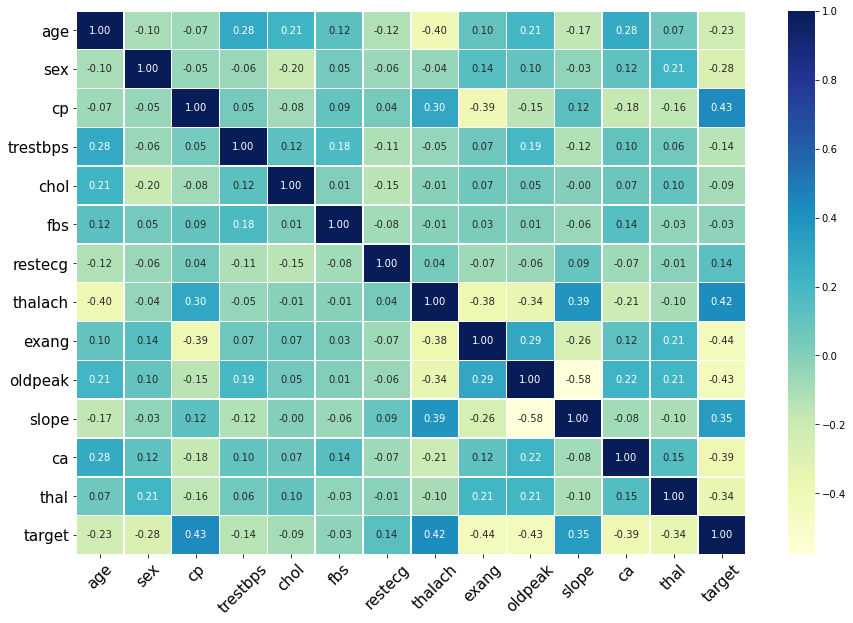

In [8]:
# Make the coorelation matrix more prettier
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
plt.xticks(fontsize=15, rotation=45);
plt.yticks(fontsize=15, rotation=0);
#ax = sns.set(font_scale=0.5);
#sns.set_context("poster",font_scale=.7)

**Inference:**
   * Higher Values: Positive Correlation 
   * Lower Values:  Negative Correlation

## Step 5: Modelling
* Scikit Learn Workflow starts
* Split the data in X & Y
* Training, Validation and Test Set
* Select ML Models or Algorithms

In [10]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Split the data into X and Y
X = heart_disease.drop("target", axis=1)  #13 Feature Vars
Y = heart_disease["target"]

In [7]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
Y 

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
# Split the data into train and test set
np.random.seed(7)

# Split the data tnto train (80%) & test (20%) data
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2)

In [16]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [17]:
Y_train

245    0
267    0
268    0
150    1
168    0
      ..
211    0
67     1
25     1
196    0
175    0
Name: target, Length: 242, dtype: int64

### Select Models
* Now we have got our data split into training and test data sets, it's time to build a machine learning model. 
* We'll train it (to find patterns) on the training set
* we'll test it (using the patterns) on the test set

* We are going to try three different ML models
     1. *Logistics Regression* (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
     2. *K-Nearest Neighbors Classifier*
     3. *Random Forest Classifier*

In [9]:
# Put Models in a dictionary ({key:value} pair)

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a f(x) to fit and score models 
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn ML models
    X_train: training  data set (no lables)
    X_test: test data set (no lables)
    Y_training: training lables
    Y_test: test labels   
    
    """
    # Set random seed
    np.random.seed(7)
    # Make a dictinary to keep the model scores in one place
    model_scores= {}
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(X_train, Y_train)
        
        # Evaluate the model and append it's score to model_scores{}
        model_scores[name] = model.score(X_test, Y_test)
    
    return model_scores;

In [10]:
# Function Call 
model_scores = fit_and_score(models,
                             X_train,
                             X_test,
                             Y_train,
                             Y_test)

model_scores

g:\ML_Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7540983606557377,
 'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361}

#### Model Comparison

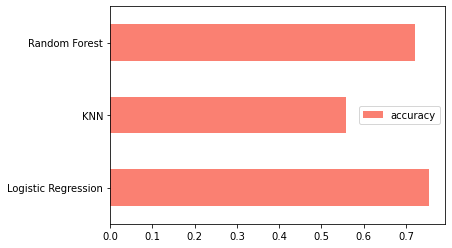

In [11]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.barh(color = "salmon"); # Transpose 

In [8]:
model_compare.T

,accuracy
Logistic Regression,0.754098
KNN,0.557377
Random Forest,0.721311


**Inference:**
* We'll use Logistic Regression model for Heart Disease Prediction.
* We have got a baseline model...and we know a model's  first prediction aren't always we should based our next steps off. What should we do ???

Followings are the next steps (for a <font color= #b80300>Classification Problem</font>)
* Hyper-parameter tuning (General)
* Feature importance (General)
<font color= #b80300>
* Confusion Matrix 
* Cross-validation (**RandomizedSearchCV**, **GridSearchCV**)
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area Under Curve (AUC)
</font>

### Hyper-Parameter Tuning  (by hand)

#### K-Nearest Neighbors (KNN)

In [29]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n-neighbors
neighbors = range(1, 51)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))

In [30]:
len(neighbors)

50

In [64]:
train_scores

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7024793388429752,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339,
 0.6818181818181818]

In [65]:
test_scores

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853]

#### KNN Visualization

Maximum KNN score the test data: 70.49%


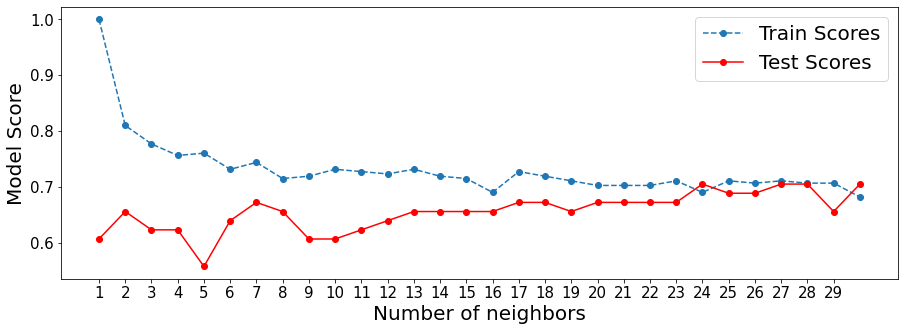

In [11]:
plt.figure(figsize=(15,5)) 
plt.plot(neighbors, train_scores, label="Train Scores", marker='o', linestyle = '--')
plt.plot(neighbors, test_scores, label="Test Scores",color = "red", marker='o')

plt.xlabel("Number of neighbors", fontsize=20)
plt.ylabel("Model Score", fontsize=20)

plt.xticks(np.arange(1, len(neighbors), 1))
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0);

plt.legend(fontsize=20)

print(f"Maximum KNN score the test data: {max(test_scores)*100:.2f}%")

Maximum KNN score the test data: 70.49%


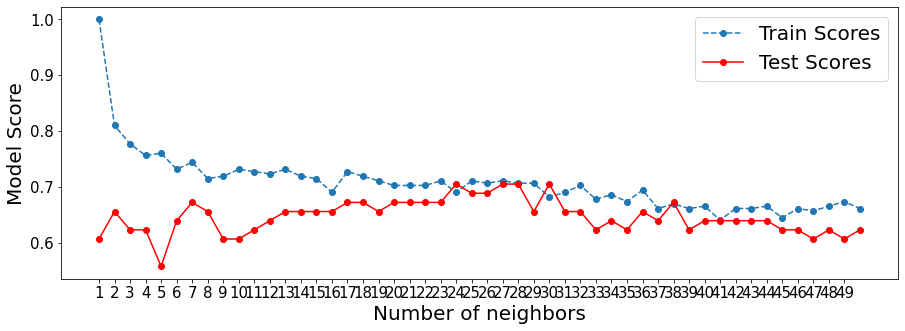

In [31]:
plt.figure(figsize=(15,5)) 
plt.plot(neighbors, train_scores, label="Train Scores", marker='o', linestyle = '--')
plt.plot(neighbors, test_scores, label="Test Scores",color = "red", marker='o')

plt.xlabel("Number of neighbors", fontsize=20)
plt.ylabel("Model Score", fontsize=20)

plt.xticks(np.arange(1, len(neighbors), 1))
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0);

plt.legend(fontsize=20)

print(f"Maximum KNN score the test data: {max(test_scores)*100:.2f}%")

### Hyper-Parameter Tuning (using RandomizedSearchCV)

We are going to tune:
* LogisticRegression
* Random Forest Classifier

Resources: https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

In [10]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
        "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we have got hyperparameters grid setup for each of our model, let's tune them using Randomized SearchCV

#### Logistic Regression Tuning (lecture 161)
Check Scikit-Learn user guide

In [16]:
np.random.seed(7)

# Setup random hyper-parameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyper-parameter search model for LogisticRegression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [17]:
#Find the best parameters of log_reg
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [27]:
# Evaluate the Randoized Search Logistic Regression Model
rs_log_reg.score(X_test, Y_test)

0.7540983606557377

Now we've tuned LogisticRegression() which yield the same results as previous (only tuned small number of hypar-parameters)

#### Random Forest Classifier Tuning (Lecture 161)

In [23]:
np.random.seed(7)

# Setup random hyper-parameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyper-parameter search model for Random Forest Classifier
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
#Find the best parameters of rf
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [26]:
# Evaluate the Randoized Search RandomForestClassifier Model
rs_rf.score(X_test, Y_test)

0.7377049180327869

In [29]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.754098,0.557377,0.721311


RFC Score Improved

### Hyper-Parameter Tuning (using GridSearchCV)

We are going to tune:
* LogisticRegression
* Random Forest Classifier

In [12]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

np.random.seed(7)

# Setup grid hyperparqmaeters search got LogidticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyper-parameters search model
gs_log_reg.fit(X_train, Y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


In [13]:
#Find the best parameters oflog_reg
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [14]:
# Evaluate the grid search LogisticsRegression Model
gs_log_reg.score(X_test, Y_test)

0.7540983606557377

In [14]:
model_scores

{'Logistic Regression': 0.7540983606557377,
 'KNN': 0.5573770491803278,
 'Random Forest': 0.7213114754098361}

### Evaluating Tuned ML Cleassifier (beyond accuracy)
* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation is used wherever possible.

To make comparison and evaluate our trained model, first we need to make predictions

In [15]:
# Make predictions with tuned model
Y_preds = gs_log_reg.predict(X_test)
Y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [19]:
np.array(Y_test)

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

#### ROC Curve and AUC score

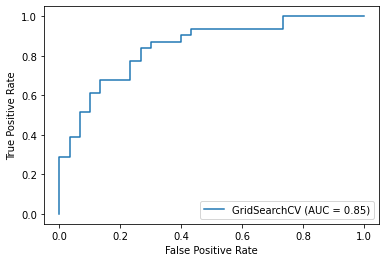

In [17]:
# Plot ROC curve and Calculate AUC metric 
plot_roc_curve(gs_log_reg, X_test, Y_test);

In [20]:
import pylab as p
p.fill(fpr, tpr, facecolor='red', alpha=1.5);

NameError: name 'fpr' is not defined

#### Confusion Matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [22]:
print(confusion_matrix(Y_test, Y_preds))

[[18 12]
 [ 3 28]]


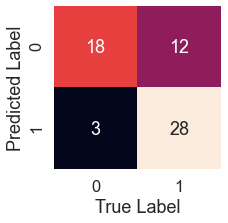

In [41]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, Y_preds):
    """
        Plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                            annot=True,
                            cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(Y_test, Y_preds)

#### Classfication Report
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [44]:
# Only on one set 
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



#### Classification Report using cross-validation (CV) 
We are going to calculate accuracy, precision, recall and f1-score of our model using the `cross_val_score()` function


In [46]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [47]:
# Create new classifier with the best hyper-parameters
clf = LogisticRegression(C=0.615848211066026,
                         solver = "liblinear")


In [48]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.85245902, 0.85245902, 0.85      , 0.75      ])

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8249180327868852

In [53]:
# Cross validated precision
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8122549019607843

In [55]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.890909090909091

In [57]:
# Cross validated recall
cv_f1 = cross_val_score(clf,
                         X,
                          Y,
                         cv=5,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8481221874318333

### Visualization

   Accuracy  Precision    Recall        F1
0  0.824918   0.812255  0.890909  0.848122


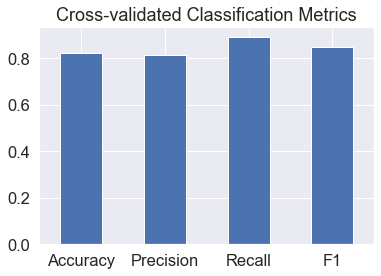

In [70]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                            index=[0])

print(cv_metrics)
cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend = False, rot=0);

### Feature Importance

Feature importance is another way of asking "Which features contributed the most to the outcomes of the model and how did they contribute ??"

* Finding feature importance is differerntfor each machine learning model
* One way to find feature importance is to Google for "(MODEL NAME) feature importance
* let's find the features importance for LogisticsRegression Model

In [73]:
# Fit an instance of LogisticRegression Model
clf = LogisticRegression(C=0.615848211066026,
                         solver = "liblinear")
clf.fit(X_test, Y_test);

In [74]:
# Check coef_ (lecture 167): How much contrubution each of the features (e.g. age, sex, thalach etc.) have done to predict the target column
clf.coef_

array([[-4.95644799e-02, -2.53178782e-01,  6.47465282e-01,
        -6.97807182e-04, -6.64304665e-03, -1.31250108e-01,
         4.49613293e-01,  2.48121600e-02, -3.56829580e-02,
        -3.03752506e-01,  3.60593771e-01, -9.53717662e-01,
         1.33869389e-01]])

In [77]:
# Match the coef's values to independent feature columns
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.049564479888050454,
 'sex': -0.25317878186447174,
 'cp': 0.6474652815370178,
 'trestbps': -0.0006978071820623479,
 'chol': -0.006643046647094489,
 'fbs': -0.13125010763796066,
 'restecg': 0.4496132928474755,
 'thalach': 0.024812160021860912,
 'exang': -0.03568295803659443,
 'oldpeak': -0.3037525064977484,
 'slope': 0.3605937714466398,
 'ca': -0.9537176620050085,
 'thal': 0.13386938873516616}

In [82]:
 heart_disease[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


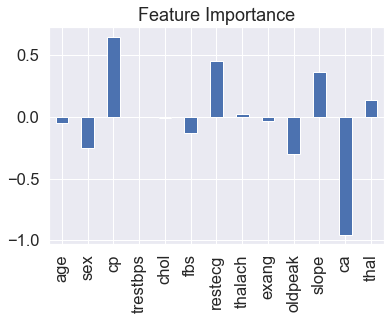

In [80]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [83]:
pd.crosstab(heart_disease["slope"], heart_disease["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


**slope** - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## Step 6: Experimentation


**Goal: 95% accuracy**

**We achived: 82% accuracy**

So....this model haven't hit our evaluation metrix......
* Could we collect more data ??
* Could we try a better model ?? like CatBoost or XGBoost ?
* Could we improve the  current models ?? (more hyperparameter tuning)
 

**If the goal is achived thrn export the ML model with pickle or joblib to share with others**

# Finished